In [1]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import graphviz

In [6]:
df = pd.read_csv('HEART.csv')


In [7]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,False
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,True
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,False
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,True
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,False
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,True
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,True
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,True
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,True


In [8]:
from sklearn import tree

In [9]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

X = df[['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope']]
y = df['HeartDisease']

#perform label encoding with the data:

encoded_sex = LabelEncoder()
encoded_ChestPainType = LabelEncoder()
encoded_RestingECG = LabelEncoder()
encoded_ExerciseAngina = LabelEncoder()
encoded_ST_Slope = LabelEncoder()
encoded_HeartDisease = LabelEncoder()

In [10]:
df['encoded_sex'] = encoded_sex.fit_transform(df['Sex'])
df['encoded_ChestPainType'] = encoded_sex.fit_transform(df['ChestPainType'])
df['encoded_RestingECG'] = encoded_sex.fit_transform(df['RestingECG'])
df['encoded_ExerciseAngina'] = encoded_sex.fit_transform(df['ExerciseAngina'])
df['encoded_ST_Slope'] = encoded_sex.fit_transform(df['ST_Slope'])
df['encoded_HeartDisease'] = encoded_sex.fit_transform(df['HeartDisease'])

In [11]:
df.head(20)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,encoded_sex,encoded_ChestPainType,encoded_RestingECG,encoded_ExerciseAngina,encoded_ST_Slope,encoded_HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,False,1,1,1,0,2,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,True,0,2,1,0,1,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,False,1,1,2,0,2,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,True,0,0,1,1,1,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,False,1,2,1,0,2,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,False,1,2,1,0,2,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,False,0,1,1,0,2,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,False,1,1,1,0,2,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,True,1,0,1,1,1,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,False,0,1,1,0,2,0


In [12]:
new_df = df.drop(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope',  'HeartDisease' ], axis='columns')

In [13]:
new_X = df[['Age', 'encoded_sex', 'encoded_ChestPainType', 'encoded_RestingECG', 'Cholesterol', 'FastingBS', 'MaxHR', 'encoded_ExerciseAngina', 'Oldpeak', 'encoded_ST_Slope']]
new_y = df['encoded_HeartDisease']

In [15]:
modelID3 = tree.DecisionTreeClassifier(criterion='entropy')

In [16]:
modelID3.fit(new_X, new_y)

DecisionTreeClassifier(criterion='entropy')

In [17]:
features_names = [i for i in new_X.columns]
new_y_str = new_y.astype('str')
new_y_str[new_y_str=='0']="No Disease"
new_y_str[new_y_str=='1']="Disease"
new_y_str=new_y_str.values

In [19]:
from sklearn.tree import export_graphviz

export_graphviz(modelID3, out_file = 'DecisionTreeHealth.dot', feature_names = features_names, class_names=new_y_str, filled = True, rounded =  True, max_depth = 3)

In [20]:
import graphviz



In [21]:
with open("DecisionTreeHealth.dot") as pic:
    dot_graph = pic.read()

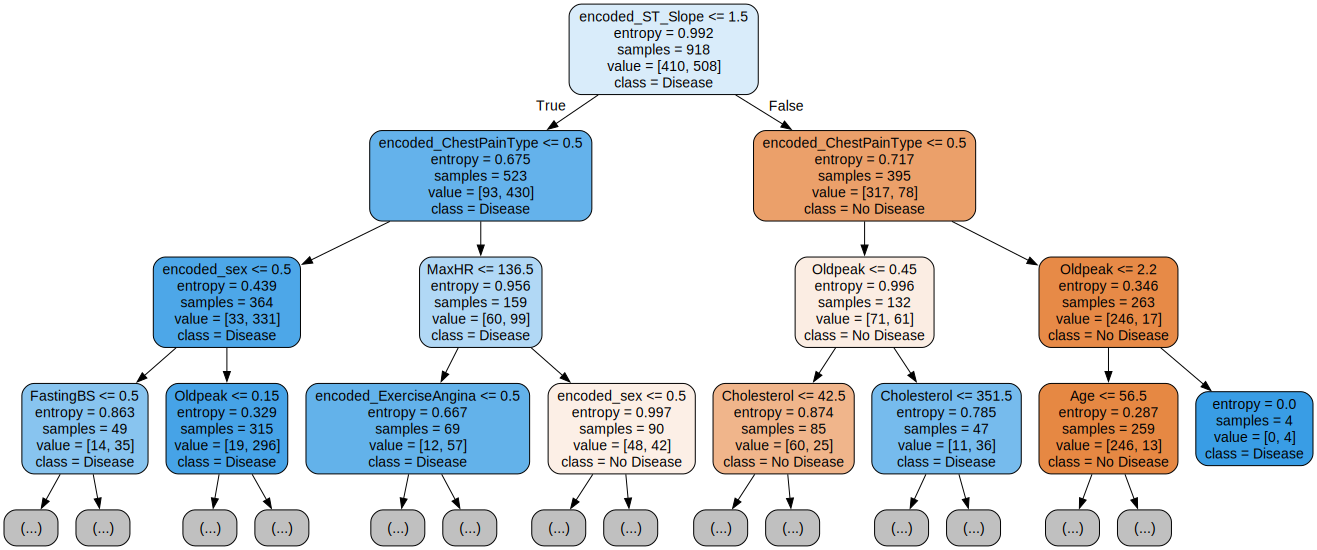

In [22]:
display(graphviz.Source(dot_graph))

In [25]:
Decision_Tree = graphviz.Source(dot_graph)

In [26]:
Decision_Tree.format = 'png'
Decision_Tree.render('Decision_TreeID3')

'Decision_TreeID3.png'